# Experimenting with Submission Stacking
_by Nick Brooks, Janurary 2018_

- [**Github**](https://github.com/nicapotato)
- [**Kaggle**](https://www.kaggle.com/nicapotato/)
- [**Linkedin**](https://www.linkedin.com/in/nickbrooks7)

***
## Correlate the Results:
<a id="COR"></a>

What does it mean to correlate these values?

What if I used a "match-up" ("Accuracy" between outputs) rate instead?

In [12]:
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = (16, 8)
import scikitplot as skplt
from sklearn import metrics

In [21]:
train_hard_pred_matrix = pd.read_csv("Titanic Support/Submission Matrix/train_hard_pred_matrix.csv", index_col='PassengerId')
train_soft_pred_matrix = pd.read_csv("Titanic Support/Submission Matrix/train_soft_pred_matrix.csv", index_col='PassengerId')
test_hard_pred_matrix = pd.read_csv("Titanic Support/Submission Matrix/test_hard_pred_matrix.csv", index_col='PassengerId')
test_soft_pred_matrix = pd.read_csv("Titanic Support/Submission Matrix/test_soft_pred_matrix.csv", index_col='PassengerId')

In [36]:
results = pd.read_csv("titanic_clf_results.csv")

In [39]:
results[~results["Model"].str.contains("Voting")]

,Model,Para,Test_Score,CV Mean,CV STDEV
5,Random_Forest,"{'max_depth': 9, 'max_leaf_nodes': 9, 'n_estim...",0.839552,0.829698,0.032009
11,SVCrbf,"{'svc__gamma': 0.00035938136638046257, 'svc__C...",0.835821,0.824872,0.032909
12,Sci_kit XGB,"{'colsample_bytree': 0.87131674191566333, 'lea...",0.813433,0.823350,0.030895
13,stacked,"LogisticRegression(C=1.0, class_weight=None, d...",0.802239,0.821229,0.028486
14,XGBsklearn,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.876866,0.820800,0.040980
15,AdaBoost_Ensemble,"{'learning_rate': 0.10000000000000001, 'n_esti...",0.794776,0.818550,0.013987
16,PCA_SVC,"{'svc__gamma': 0.0027825594022071257, 'svc__C'...",0.835821,0.813724,0.021853
17,XGBstandard,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.876866,0.813433,0.000000
18,Logistic_Regression,"LogisticRegression(C=1.0, class_weight=None, d...",0.802239,0.809600,0.031759
19,LinearSV,"LinearSVC(C=1.0, class_weight=None, dual=True,...",0.828358,0.804800,0.027058


In [37]:
# View Results
results

,Model,Para,Test_Score,CV Mean,CV STDEV
0,5-VM-Ensemble Soft Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.832090,0.837724,0.030745
1,7-VM-Ensemble Soft Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.824627,0.834524,0.029914
2,10-VM-Ensemble Soft Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.835821,0.832924,0.027560
3,3-VM-Ensemble Soft Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.835821,0.831298,0.029377
4,5-VM-Ensemble Hard Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.828358,0.829724,0.024528
5,Random_Forest,"{'max_depth': 9, 'max_leaf_nodes': 9, 'n_estim...",0.839552,0.829698,0.032009
6,3-VM-Ensemble Hard Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.839552,0.829698,0.032009
7,10-VM-Ensemble Hard Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.832090,0.828124,0.024588
8,2-VM-Ensemble Soft Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.835821,0.828098,0.029991
9,7-VM-Ensemble Hard Voting,EnsembleVoteClassifier(clfs=[RandomForestClass...,0.824627,0.826524,0.026548


In [22]:
# View Example
train_hard_pred_matrix.sample(5)

,LinearSV,StochasticGradientDescent,Random_Forest,SVCrbf,Sci_kit XGB,XGBsklearn,AdaBoost_Ensemble,PCA_SVC,XGBstandard,Logistic_Regression,...,Gaussian,Gradient_Boosting,Bagger_ensemble,FFNeural_Net,2-VM-Ensemble Hard Voting,3-VM-Ensemble Hard Voting,5-VM-Ensemble Hard Voting,7-VM-Ensemble Hard Voting,10-VM-Ensemble Hard Voting,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
255,1,1,1,1,0,0,1,0,0,1,...,1,0,0,0,1,1,1,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


## Experimental: Introducing the "Accuracy Matrix" Heatmap
Instead of taking the correlation coefficient, I calculate the accuracy score between models. Purely Experimental.

In [23]:
def accuracy_matrix(data):
    df = pd.DataFrame(columns = data.columns, index = data.columns)
    for row in data.columns:
        for col in data.columns:
            df.loc[row,col] = metrics.accuracy_score(data.loc[:,row],data.loc[:,col]).astype(float)
    for x in df.columns:
        df[x] = df[x].astype(float)
    return df

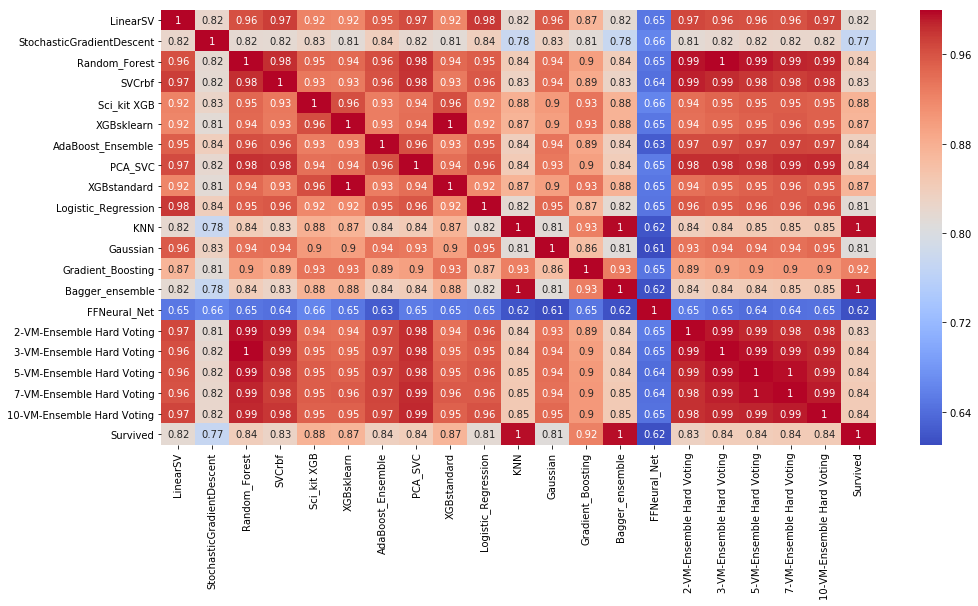

In [24]:
# Hard Train Accuracy Matrix, All Models
sns.heatmap(accuracy_matrix(train_hard_pred_matrix), annot=True,cmap="coolwarm")
plt.show()

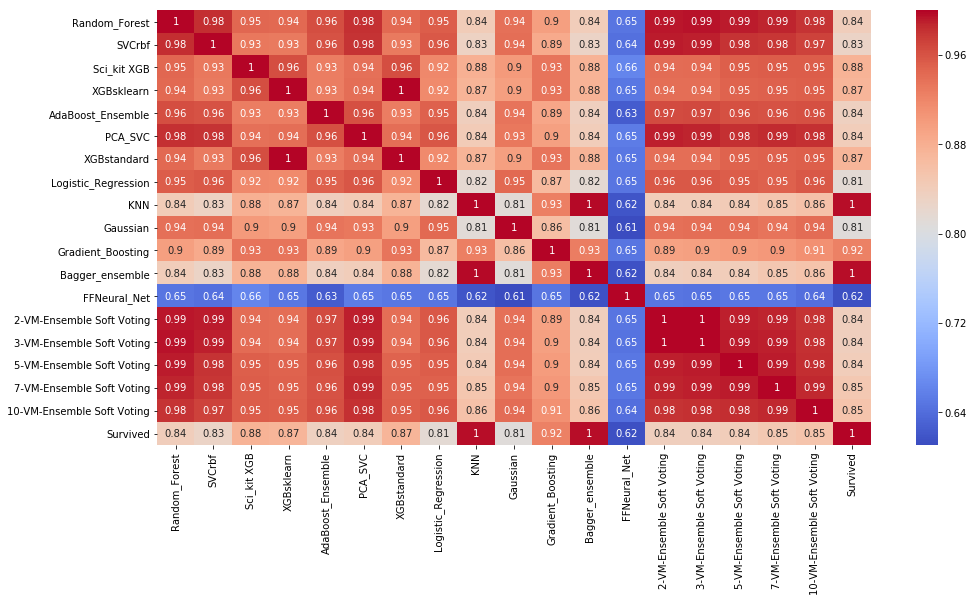

In [25]:
# Soft Train Accuracy Matrix, All Models
sns.heatmap(accuracy_matrix(train_soft_pred_matrix), annot=True,cmap="coolwarm")
plt.show()

### Test Set Correlation

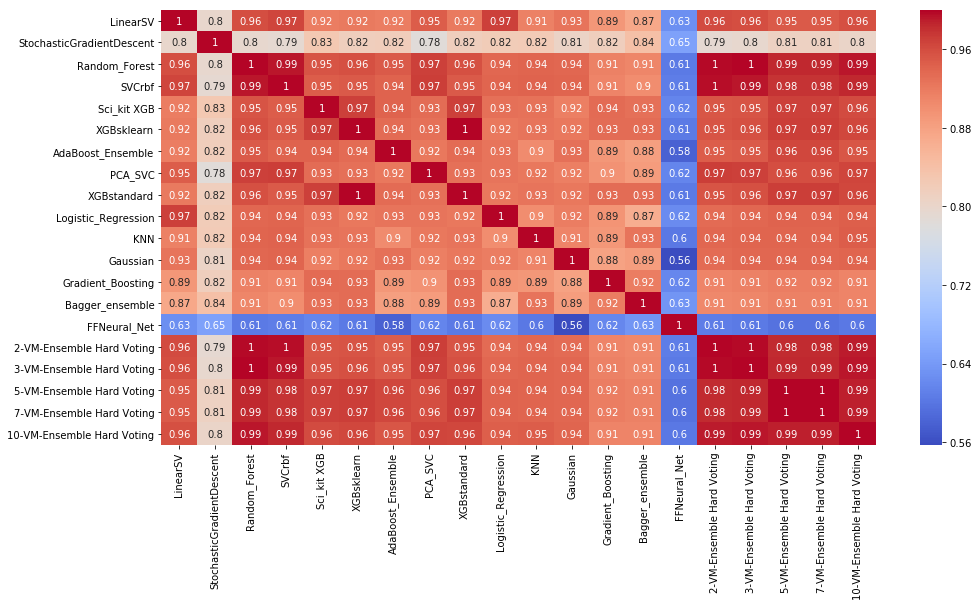

In [26]:
# Soft Test Accuracy Matrix, All Models
sns.heatmap(accuracy_matrix(test_hard_pred_matrix), annot=True,cmap="coolwarm")
plt.show()

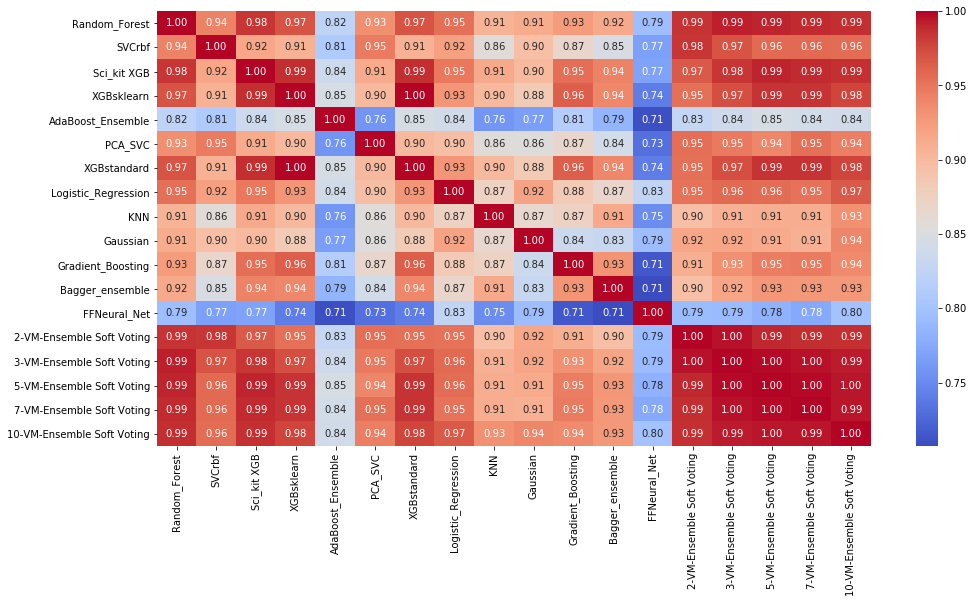

In [27]:
# Test Soft Correlation, All Models
sns.heatmap(test_soft_pred_matrix.corr(), annot=True, fmt=".2f",cmap="coolwarm")
plt.show()

## Stacking Pobabilistic Output: [Explore Stacking](https://www.kaggle.com/dongxu027/explore-stacking-lb-0-1463)

1. **Mean Stacking**
2. **Median Stacking**
3. **PushOut + Median Stacking**
4. **MinMax + Mean Stacking**
5. **MinMax + Median Stacking**
6. **MinMax + BestBase Stacking**

I wish to combine models based on the accuracy score matrix from the previous section.

## In development..

In [28]:
trial = train_soft_pred_matrix.copy()

In [29]:
train_soft_pred_matrix = trial.copy()

In [30]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.8
cutoff_hi = 0.2

# Gather Descriptive Statistics for Stacking
def manual_stack(data):
    df = pd.DataFrame()
    df['max'] = data.max(axis=1) # axis = By Row
    df['min'] = data.min(axis=1)
    df['mean'] = data.mean(axis=1)
    df['median'] = data.median(axis=1)
    return df

In [34]:
stack_results = pd.DataFrame()
def stack_evaluation(data, eval_set):
    modelname = data.columns
    acc = metrics.accuracy_score(data, eval_set)
    stack_results = results.append({'Model': "Stack_{}".format(modelname),
                                    'Test_Score': acc,}, ignore_index=True)

In [35]:
stack_evaluation(train_soft_pred_matrix.iloc[:,:1], y)

NameError: name 'y' is not defined

In [ ]:
train_stacks = manual_stack(train_soft_pred_matrix.loc[:,hard_models.Model[:5]])
train_stacks.sample(10)

In [ ]:
# concat_sub['is_iceberg'] = concat_sub['is_iceberg_mean']
# concat_sub[['id', 'is_iceberg']].to_csv('stack_mean.csv',index=False, float_format='%.6f')

## Experimental: Introducing the "Accuracy Matrix" Heatmap
Instead of taking the correlation coefficient, I calculate the accuracy score between models. Purely Experimental.

In [ ]:
def accuracy_matrix(data):
    df = pd.DataFrame(columns = data.columns, index = data.columns)
    for row in data.columns:
        for col in data.columns:
            df.loc[row,col] = metrics.accuracy_score(data.loc[:,row],data.loc[:,col]).astype(float)
    for x in df.columns:
        df[x] = df[x].astype(float)
    return df

In [ ]:
# Hard Train Accuracy Matrix, All Models
sns.heatmap(accuracy_matrix(train_hard_pred_matrix), annot=True,cmap="coolwarm")
plt.show()

In [ ]:
# Soft Train Accuracy Matrix, All Models
sns.heatmap(accuracy_matrix(train_soft_pred_matrix), annot=True,cmap="coolwarm")
plt.show()

### Test Set Correlation

In [ ]:
# Soft Test Accuracy Matrix, All Models
sns.heatmap(accuracy_matrix(test_hard_pred_matrix), annot=True,cmap="coolwarm")
plt.show()

In [ ]:
# Test Soft Correlation, All Models
sns.heatmap(test_soft_pred_matrix.corr(), annot=True, fmt=".2f",cmap="coolwarm")
plt.show()

## Stacking Pobabilistic Output: [Explore Stacking](https://www.kaggle.com/dongxu027/explore-stacking-lb-0-1463)

1. **Mean Stacking**
2. **Median Stacking**
3. **PushOut + Median Stacking**
4. **MinMax + Mean Stacking**
5. **MinMax + Median Stacking**
6. **MinMax + BestBase Stacking**

I wish to combine models based on the accuracy score matrix from the previous section.

## In development..

In [ ]:
trial = train_soft_pred_matrix.copy()

In [ ]:
train_soft_pred_matrix = trial.copy()

In [ ]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.8
cutoff_hi = 0.2

# Gather Descriptive Statistics for Stacking
def manual_stack(data):
    df = pd.DataFrame()
    df['max'] = data.max(axis=1) # axis = By Row
    df['min'] = data.min(axis=1)
    df['mean'] = data.mean(axis=1)
    df['median'] = data.median(axis=1)
    return df

In [ ]:
stack_results = pd.DataFrame()
def satck_evaluation(data, eval_set):
    modelname = data.columns
    acc = metrics.accuracy_score(data, eval_set)
    stack_results = results.append({'Model': "Stack_{}".format(modelname),
                                    'Test_Score': acc,}, ignore_index=True)

In [ ]:
satck_evaluation(train_stacks.iloc[:,:1], y)

In [ ]:
train_stacks = manual_stack(train_soft_pred_matrix.loc[:,hard_models.Model[:5]])
train_stacks.sample(10)

In [ ]:
# concat_sub['is_iceberg'] = concat_sub['is_iceberg_mean']
# concat_sub[['id', 'is_iceberg']].to_csv('stack_mean.csv',index=False, float_format='%.6f')

## Reflection
<a id="REFL"></a>
A recurrent theme that I have observed is that the accuracy on the testing set is always higher than that of the submission set. This suggests that there is a disconnected representation of the underlying data distributions. A likely contributor to this problem is the quality of pre-processing, whose features appeared to have redundant effects, such as Title and Sex. A quick fix could be dimensionality reduction, but ultimately if proper exploration of features is conducted, then the “garbage in” problem can be minimized.

I think for this type of problem, elaborating on the stacked methodology might be key.

### On Confusion Matrix
Accross the board, most errors are false negatives. The model expected many of the deceased to have survived. This is perhaps why the ensembling only provided minor improvements, since it combined models with the same underlying prediction problem. 

Note: Deep Learning references are to be taken **LIGHTLY!**, currently reading Ian Goodfellow’s book, so this stuff is on my mind.

### Thank You for making it this far! Next, I am thinking of either pursuing a wide application Regression models on another dataset, or doubling down on the exploratory analysis and feature engineering for Titanic! 

### *What say you?* P.S, Looking for constructive feedback :)